<a href="https://colab.research.google.com/github/DEADL0CKK/netflix_dataset/blob/main/netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
netflix = pd.read_csv(r'/content/drive/MyDrive/IPSSI/Machine_Learning/netflix-rotten-tomatoes-metacritic-imdb.csv')
print(netflix.columns)


Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')


In [13]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site'],axis=1)
df_netflix

,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,HOW TO BUILD A GIRL,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,Centigrade,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,ANNE+,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,Moxie,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [17]:
df_netflix.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000
mean,5.937551,6.496054,59.523034,56.813653,8.764444
std,2.250202,1.146910,26.999173,17.582545,18.311171
min,0.600000,1.000000,0.000000,5.000000,1.000000
25%,3.800000,5.800000,38.000000,44.000000,1.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000
75%,7.900000,7.300000,83.000000,70.000000,8.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000


In [19]:
df_netflix.describe(include=['O'])

,Title,Genre,Languages,Series or Movie,Country Availability,Runtime,Director,Writer,Actors,View Rating,Boxoffice,Release Date,Netflix Release Date,Production House
count,15480,13770,13545,15480,15461,15479,10772,11150,13555,8456,4007,13373,15480,5149
unique,15071,1780,1438,2,7530,4,6746,9650,12934,28,3836,5314,1823,3814
top,Godzilla,Comedy,English,Movie,Japan,1-2 hour,Steven Spielberg,Fujio F. Fujiko,"Noriko Ohara, Nobuyo Ôyama, Kaneta Kimotsuki, ...",R,"$474,544,677",12 Oct 2018,2015-04-14,Netflix
freq,4,1186,5133,11697,1339,9121,28,17,15,2096,12,24,2407,82


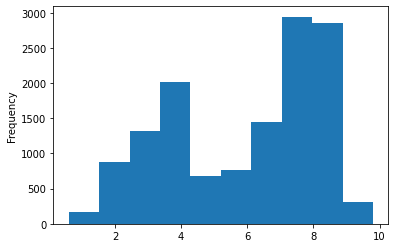

In [22]:
#Score qui determine la note d'un film selon sa note d'évaluation par rapport à sa popularité
df_netflix['Hidden Gem Score'].plot.hist()

In [32]:
#Corrélation sur tous les scores present dans le dataset
# Il y a une corrélation plus présente dans le Score Metacritique et le score rotten tomatoes
corr = df_netflix.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
Hidden Gem Score,1.00,0.12,0.40,0.52,-0.11
IMDb Score,0.12,1.00,0.71,0.72,0.29
Rotten Tomatoes Score,0.40,0.71,1.00,0.90,0.30
Metacritic Score,0.52,0.72,0.90,1.00,0.43
Awards Received,-0.11,0.29,0.30,0.43,1.00


In [34]:
# analyse du temps de durée du contenu présent
df_netflix.Runtime.value_counts(normalize=True)*100

1-2 hour        58.924995
< 30 minutes    25.815621
> 2 hrs         13.101622
30-60 mins       2.157762
Name: Runtime, dtype: float64

In [36]:
df_netflix['Series or Movie'].value_counts(normalize=True)*100

Movie     75.562016
Series    24.437984
Name: Series or Movie, dtype: float64